In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
import pandasql as ps
from pandasql import *
from pandas import DataFrame


In [108]:
filename1 = 'C:/Users/vatsa/Master_Accident_Data.xlsx'
accident_data = pd.read_excel(filename1)
print(accident_data.head())

              accdate  Operator_ID  \
0 2017-03-15 18:20:00          365   
1 2016-05-18 08:27:00          173   
2 2018-09-12 14:09:00          329   
3 2019-05-07 15:00:00          276   
4 2015-05-12 07:15:00           42   

                              AccTypeCodeDescr  \
0               Vehicle Approaching From Angle   
1                              Vehicle Passing   
2         Collisions with other motor vehicles   
3               Vehicle Approaching From Angle   
4  Passenger On Board Thrown By RGRTA Movement   

                                 AccSubTypeCodeDescr  \
0  Vehicle approaches from right-both straight ac...   
1     Vehicle cuts in and scrapes RGRTA on left side   
2                                      Miscellaneous   
3  Vehicle approaches from left-vehicle turns-RGR...   
4  Other part of equipment-passenger standing or ...   

                         acctype BAITFISH Code FileNumber   AccPreventable  \
0          03 - MVA with Vehicle             0     17-2

In [105]:
filename2 = 'C:/Users/vatsa/Master_Absence_Data.xlsx'
absence_data = pd.read_excel(filename2)
print(absence_data.head())


  Absence_Type  Operator_ID  From_Date From_Time    To_Date To_Time  \
0       Absent            1 2019-03-13      0:00 2019-03-13   25:00   
1       Absent            1 2019-02-08      0:00 2019-02-08   25:00   
2       Absent            1 2019-06-10      0:00 2019-06-12   25:00   
3       Absent            1 2019-06-06      0:00 2019-06-07   25:00   
4       Absent            1 2019-06-05      0:00 2019-06-05   25:00   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN  


In [110]:
filename3 = 'C:/Users/vatsa/Master_Scheduled_Days_Off.xlsx'
schedule_data = pd.read_excel(filename3)
print(schedule_data.head())

  Effective_On No_Longer_Effective_After Pick_Name Seniority_Date  \
0   2016-04-04                2016-06-26   APR2016     06-20-1974   
1   2016-04-04                2016-06-26   APR2016     08-22-1974   
2   2016-04-04                2016-06-26   APR2016     06-22-1977   
3   2016-04-04                2016-06-26   APR2016     08-03-1977   
4   2016-04-04                2016-06-26   APR2016     02-04-1980   

   Operator_ID   Sun  Mon  Tue  Wed  Thu  Fri   Sat Type_Work  
0            1   OFF  NaN  NaN  NaN  NaN  NaN   OFF   REGULAR  
1            2   OFF  NaN  NaN  NaN  NaN  NaN   OFF        XB  
2            3   OFF  NaN  NaN  NaN  NaN  NaN   OFF   REGULAR  
3            5   OFF  NaN  NaN  NaN  NaN  NaN   OFF   REGULAR  
4            6   OFF  NaN  NaN  NaN  NaN  NaN   OFF        XB  


In [109]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis = 1, keys = ['Total NaN values', 'Percentage of NaN values'])

print(missing_data(accident_data))

accident_data_copy = accident_data.copy()
#print(accident_data_copy.head())

                        Total NaN values  Percentage of NaN values
RetrainingDate                       748                 56.925419
VehNoOccupants                       720                 54.794521
LocAddr1                             276                 21.004566
Addr_Type                            267                 20.319635
RoadwaySurface                       155                 11.796043
RoadwayWeather                       146                 11.111111
RoadwayLightConditions               135                 10.273973
Roadway                              121                  9.208524
vehmake                               37                  2.815830
vehyear                               37                  2.815830
acctype                               15                  1.141553
AccSubTypeCodeDescr                    5                  0.380518
AccTypeCodeDescr                       3                  0.228311
vehbusno                               2                  0.15

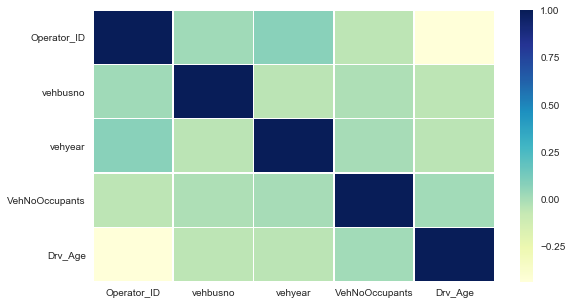

In [111]:
plt.figure(figsize=(9,5))
sns.heatmap(accident_data.corr(), linewidth=.5, cmap='YlGnBu')
plt.show()

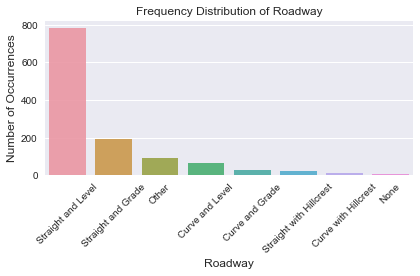

In [112]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
roadway_count = accident_data['Roadway'].value_counts()
sns.set(style="darkgrid")
sns.barplot(roadway_count.index, roadway_count.values, alpha=0.9)
#plt.figure(figsize=(10, 5))
plt.title('Frequency Distribution of Roadway')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Roadway', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

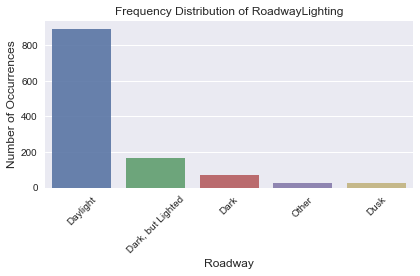

In [113]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
roadway_count = accident_data['RoadwayLightConditions'].value_counts()
sns.set(style="darkgrid")
sns.barplot(roadway_count.index, roadway_count.values, alpha=0.9)
#plt.figure(figsize=(10, 5))
plt.title('Frequency Distribution of RoadwayLighting')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Roadway', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

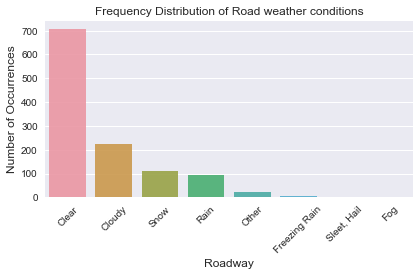

In [114]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
roadway_count = accident_data['RoadwayWeather'].value_counts()
sns.set(style="darkgrid")
sns.barplot(roadway_count.index, roadway_count.values, alpha=0.9)
#plt.figure(figsize=(10, 5))
plt.title('Frequency Distribution of Road weather conditions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Roadway', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

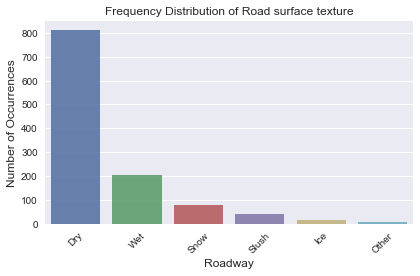

In [115]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
roadway_count = accident_data['RoadwaySurface'].value_counts()
sns.set(style="darkgrid")
sns.barplot(roadway_count.index, roadway_count.values, alpha=0.9)
#plt.figure(figsize=(10, 5))
plt.title('Frequency Distribution of Road surface texture')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Roadway', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [95]:
def create_stack_bar_data(col, df):
    aggregated = df[col].value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values


accident_data_copy['accdate']= accident_data_copy['accdate'].astype(str).str.split("/", expand = True)
print(accident_data_copy.head())

            accdate  Operator_ID                             AccTypeCodeDescr  \
0  42809.7638888889          365               Vehicle Approaching From Angle   
1  42508.3520833333          173                              Vehicle Passing   
2  43355.5895833333          329         Collisions with other motor vehicles   
3         43592.625          276               Vehicle Approaching From Angle   
4  42136.3020833333           42  Passenger On Board Thrown By RGRTA Movement   

                                 AccSubTypeCodeDescr  \
0  Vehicle approaches from right-both straight ac...   
1     Vehicle cuts in and scrapes RGRTA on left side   
2                                      Miscellaneous   
3  Vehicle approaches from left-vehicle turns-RGR...   
4  Other part of equipment-passenger standing or ...   

                         acctype BAITFISH Code FileNumber   AccPreventable  \
0          03 - MVA with Vehicle             0     17-249  Non-Preventable   
1          03 - MVA 

Here, after doing missing data exploration we realize that RetrainingDate and VehNoOccupants will hardly play a role since more than half the values are missing for these particular columns.

In [116]:
operators = accident_data['Operator_ID'].tolist()
max(operators,key=operators.count)
accident_data['Operator_ID'].value_counts()

83     12
241    12
214    12
249    11
53     10
275    10
128     9
76      9
388     8
185     8
1       8
218     8
238     8
245     7
282     7
55      7
302     7
298     7
61      7
120     7
119     7
239     7
66      7
197     7
103     7
273     7
272     7
85      7
84      7
252     7
       ..
433     1
434     1
100     1
436     1
437     1
94      1
439     1
406     1
123     1
376     1
385     1
377     1
378     1
147     1
145     1
143     1
382     1
384     1
140     1
136     1
401     1
392     1
132     1
130     1
394     1
397     1
127     1
126     1
399     1
524     1
Name: Operator_ID, Length: 470, dtype: int64

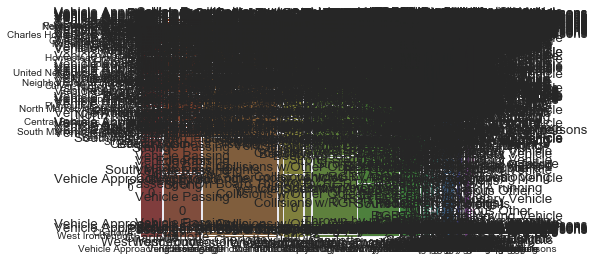

In [117]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(accident_data, ['AccTypeCodeDescr', 'Neighborhood']);

C:\Users\vatsa\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


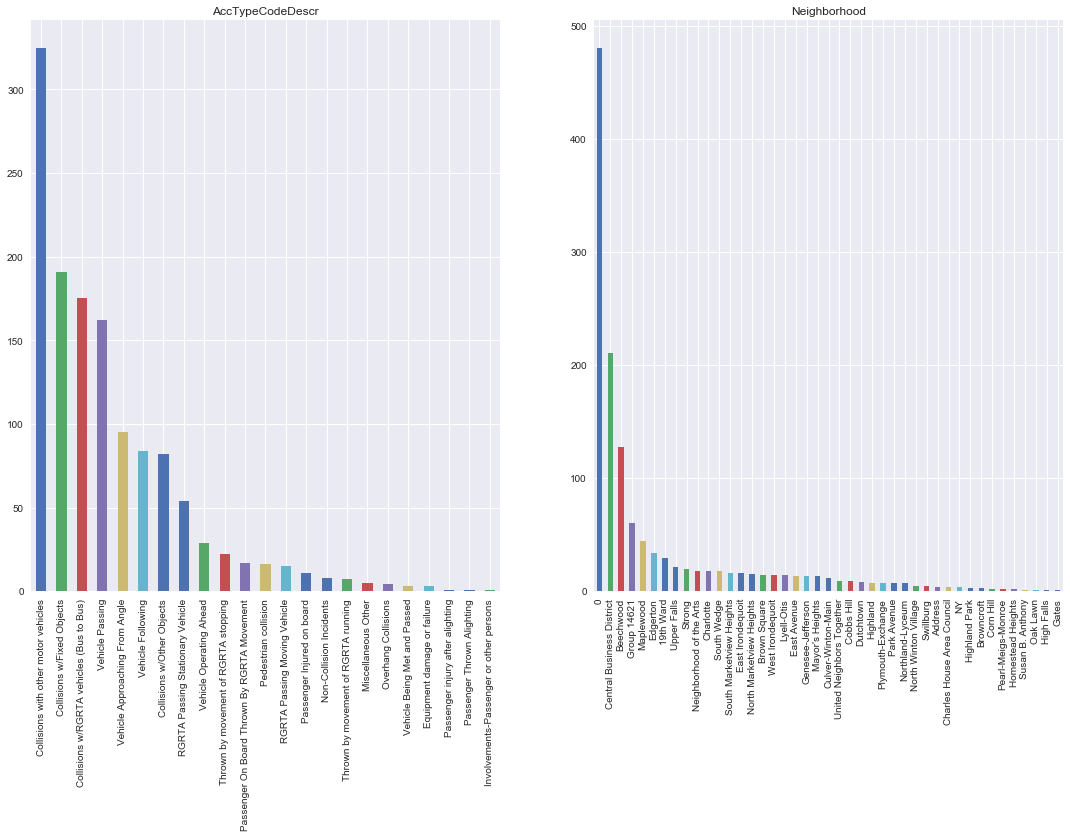

In [118]:
categorical_features = ["AccTypeCodeDescr", "Neighborhood"]
fig, ax = plt.subplots(1, len(categorical_features))
fig.set_size_inches(18.5, 10.5)
for i, categorical_feature in enumerate(accident_data[categorical_features]):
    accident_data[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

In [119]:
accident_data["Neighborhood"] = accident_data["Neighborhood"].astype('category')
accident_data["Neighborhood"] = accident_data["Neighborhood"].cat.codes
accident_data["Neighborhood"].head()

0    42
1     8
2     0
3     0
4    37
Name: Neighborhood, dtype: int8

In [120]:
accident_data["AccTypeCodeDescr"] = accident_data["AccTypeCodeDescr"].astype('category')
accident_data.dtypes
accident_data["AccTypeCodeDescr"] = accident_data["AccTypeCodeDescr"].cat.codes
accident_data["AccTypeCodeDescr"].head()


0    18
1    22
2     3
3    18
4    10
Name: AccTypeCodeDescr, dtype: int8

0     481
6     211
3     128
18     60
24     44
15     34
1      29
41     21
37     20
36     18
8      18
27     18
35     16
14     16
28     15
4      14
23     14
42     14
25     13
17     13
13     13
11     12
40      9
9       9
12      8
30      7
32      7
20      7
34      7
39      5
29      5
7       4
2       4
26      4
5       3
21      3
10      2
22      2
33      2
16      1
38      1
19      1
31      1
Name: Neighborhood, dtype: int64

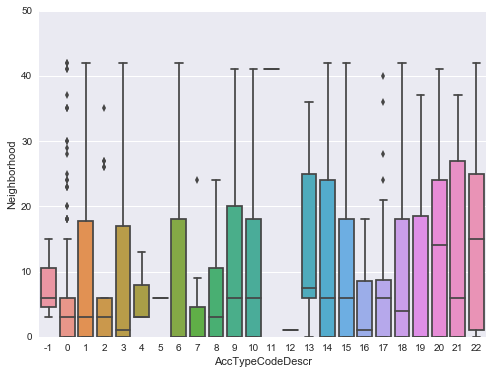

In [121]:
var = 'AccTypeCodeDescr'
data = pd.concat([accident_data['Neighborhood'], accident_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Neighborhood", data=data)
fig.axis(ymin=0, ymax=50);
accident_data['AccTypeCodeDescr'].value_counts()
#no.3 accounts for the bus to bus collisions
accident_data['Neighborhood'].value_counts()
#no.3 accounts for beechwood and no.6 accounts for central business district
#we see that almost all types of accidents have more than 50% of them occuring in the business district and beechwood

In [57]:
def get_sheets():
    """ Get sheets to join"""

    ask = input("Are the sheets in the same workbook?".lower())
    if ask == "yes" or "y":
        file = input("Please enter the filepath for the workbook")

        df1 = pd.read_excel(file, sheet_name='accident_data')
        df2 = pd.read_excel(file, sheet_name='absence_data')
        results= df1.merge(df2, on='Operator_ID', how="left")
        results.to_csv("new_merged_data.csv")
get_sheets()        

are the sheets in the same workbook?y
Please enter the filepath for the workbookC:/Users/vatsa/Master_Accident_Data.xlsx


In [122]:
accident_data1 = accident_data[['accdate', 'Operator_ID','AccPreventable']]
display('accident_data1', 'absence_data', "pd.merge(accident_data1, absence_data)")
result = pd.merge(accident_data1,absence_data, on ='Operator_ID')
result.head(150)

'accident_data1'

'absence_data'

'pd.merge(accident_data1, absence_data)'

,accdate,Operator_ID,AccPreventable,Absence_Type,From_Date,From_Time,To_Date,To_Time,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2017-03-15 18:20:00,365,Non-Preventable,Absent,2017-10-21,0:00,2017-10-21,25:00,NaN,NaN,NaN,NaN
1,2017-03-15 18:20:00,365,Non-Preventable,Absent,2017-10-23,0:00,2017-10-23,25:00,NaN,NaN,NaN,NaN
2,2017-03-15 18:20:00,365,Non-Preventable,Absent,2017-10-22,0:00,2017-10-22,25:00,NaN,NaN,NaN,NaN
3,2017-03-15 18:20:00,365,Non-Preventable,Absent,2018-12-06,0:00,2018-12-06,25:00,NaN,NaN,NaN,NaN
4,2017-03-15 18:20:00,365,Non-Preventable,Absent,2019-07-29,0:00,2019-07-29,25:00,NaN,NaN,NaN,NaN
5,2017-03-15 18:20:00,365,Non-Preventable,Absent,2019-08-19,0:00,2019-08-19,25:00,NaN,NaN,NaN,NaN
6,2017-03-15 18:20:00,365,Non-Preventable,Absent,2019-08-20,0:00,2019-08-20,25:00,NaN,NaN,NaN,NaN
7,2017-03-15 18:20:00,365,Non-Preventable,Absent,2019-06-15,0:00,2019-06-15,25:00,NaN,NaN,NaN,NaN
8,2017-03-15 18:20:00,365,Non-Preventable,Absent,2019-04-11,0:00,2019-04-11,25:00,NaN,NaN,NaN,NaN
9,2017-03-15 18:20:00,365,Non-Preventable,Absent,2019-04-10,0:00,2019-04-10,25:00,NaN,NaN,NaN,NaN


In [208]:
import sqlite3

In [216]:
conn = sqlite3.connect('project.db')
c = conn.cursor()

url = 'C:/Users/vatsa/Master_Accident_Data.xlsx'
accident_data = pd.read_excel(url)
accident_data.to_sql('MASTERACCIDENTS', conn, if_exists='append', index=False)



C:\Users\vatsa\Anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


In [217]:
c.execute('''
SELECT COUNT (*)
FROM MASTERACCIDENTS
          ''')

In [218]:
pd.read_sql_query('SELECT COUNT (*) FROM MASTERACCIDENTS', conn)

,COUNT (*)
0,1314


In [219]:
%%time
pd.read_sql_query('SELECT avg(Drv_Age) FROM MASTERACCIDENTS LIMIT 10', conn)

Wall time: 3.28 ms


,avg(Drv_Age)
0,49.536585


In [220]:
def Q(sql):
    res = pd.read_sql_query(sql, conn)
    return res
res = Q('SELECT * FROM MASTERACCIDENTS')
res.columns
res = Q('SELECT CoDrvSex, COUNT(*) FROM MASTERACCIDENTS group by CoDrvSex')


Q('SELECT COUNT(*) FROM MASTERACCIDENTS group by Operator_ID LIMIT 3' )


,COUNT(*)
0,8
1,4
2,1


In [223]:
Q("""
select
    accdate,
    substr(accdate, 1,10) as date,
    substr(accdate, 1, 4) as year,
    substr(accdate,6, 2) as month,
    substr(accdate, 9, 2) as day,
    substr(accdate, 11, 10) as time
from 
MASTERACCIDENTS
limit 3

""")
c.close()

In [229]:
conn = sqlite3.connect('project.db')
c = conn.cursor()
url2 = 'C:/Users/vatsa/Master_Absence_Data.xlsx'
absence_data = pd.read_excel(url2)
absence_data.to_sql('ABSENCE', conn, if_exists='append', index=False)

C:\Users\vatsa\Anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


In [232]:
Q('SELECT * FROM ABSENCE LIMIT 4')

,Absence_Type,Operator_ID,From_Date,From_Time,To_Date,To_Time,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Absent,1,2019-03-13 00:00:00,0:00,2019-03-13 00:00:00,25:00,None,None,None,None
1,Absent,1,2019-02-08 00:00:00,0:00,2019-02-08 00:00:00,25:00,None,None,None,None
2,Absent,1,2019-06-10 00:00:00,0:00,2019-06-12 00:00:00,25:00,None,None,None,None
3,Absent,1,2019-06-06 00:00:00,0:00,2019-06-07 00:00:00,25:00,None,None,None,None


In [246]:
Q("""
select
    Operator_ID,
    From_Date as startdate,
    substr(From_Date, 1,10) as startdate,
    substr(From_Date, 1, 4) as startyear,
    substr(From_Date,6, 2) as startmonth,
    substr(From_Date, 9, 2) as startday,
    From_Time as startime,
    To_Date as endate,
    substr(To_Date, 1,10) as endate,
    substr(To_Date, 1, 4) as endyear,
    substr(To_Date,6, 2) as endmonth,
    substr(To_Date, 9, 2) as enday,
    To_Time as endtime
from  
ABSENCE
limit 3

""")

,Operator_ID,startdate,startdate,startyear,startmonth,startday,startime,endate,endate,endyear,endmonth,enday,endtime
0,1,2019-03-13 00:00:00,2019-03-13,2019,03,13,0:00,2019-03-13 00:00:00,2019-03-13,2019,03,13,25:00
1,1,2019-02-08 00:00:00,2019-02-08,2019,02,08,0:00,2019-02-08 00:00:00,2019-02-08,2019,02,08,25:00
2,1,2019-06-10 00:00:00,2019-06-10,2019,06,10,0:00,2019-06-12 00:00:00,2019-06-12,2019,06,12,25:00


In [243]:
c.close()

In [288]:
drop_accidents_table_sql = """ DROP TABLE IF EXISTS accidents_t; """
conn.execute(drop_accidents_table_sql)

accidents_table_sql = """\
CREATE TABLE accidents_t as
select 
    Operator_ID as operator,
    accdate, 
    substr(accdate, 1,10) as date,
    substr(accdate, 1, 4) as year,
    substr(accdate,6, 2) as month,
    substr(accdate, 9, 2) as day,
    substr(accdate, 11, 10) as time
from MASTERACCIDENTS 
"""
conn.execute(accidents_table_sql)
print(pd.read_sql_query('SELECT * from accidents_t limit 3', con=conn))

   operator              accdate        date  year month day       time
0       365  2017-03-15 18:20:00  2017-03-15  2017    03  15   18:20:00
1       173  2016-05-18 08:27:00  2016-05-18  2016    05  18   08:27:00
2       329  2018-09-12 14:09:00  2018-09-12  2018    09  12   14:09:00


In [289]:
drop_absence_table_sql = """ DROP TABLE IF EXISTS absence_t; """
conn.execute(drop_absence_table_sql)

absence_table_sql = """\
CREATE TABLE absence_t as
select
    Operator_ID as operator,
    From_Date as startdate,
    substr(From_Date, 1,10) as startdate,
    substr(From_Date, 1, 4) as startyear,
    substr(From_Date,6, 2) as startmonth,
    substr(From_Date, 9, 2) as startday,
    From_Time as startime,
    To_Date as endate,
    substr(To_Date, 1,10) as endate,
    substr(To_Date, 1, 4) as endyear,
    substr(To_Date,6, 2) as endmonth,
    substr(To_Date, 9, 2) as enday,
    To_Time as endtime
from  
ABSENCE 
"""
conn.execute(absence_table_sql)
print(pd.read_sql_query('SELECT * from absence_t limit 3', con=conn))

   operator            startdate startdate:1 startyear startmonth startday  \
0         1  2019-03-13 00:00:00  2019-03-13      2019         03       13   
1         1  2019-02-08 00:00:00  2019-02-08      2019         02       08   
2         1  2019-06-10 00:00:00  2019-06-10      2019         06       10   

  startime               endate    endate:1 endyear endmonth enday endtime  
0     0:00  2019-03-13 00:00:00  2019-03-13    2019       03    13   25:00  
1     0:00  2019-02-08 00:00:00  2019-02-08    2019       02    08   25:00  
2     0:00  2019-06-12 00:00:00  2019-06-12    2019       06    12   25:00  


In [290]:
drop_accidents_absence_sql = """ DROP TABLE IF EXISTS accidents_absence_t ;"""
conn.execute(drop_accidents_absence_sql)



In [335]:
join_accidents_absence_sql = """\
    SELECT ac.operator, ac.accdate, ac.year, ac.month, ac.day, ac.time, ab.startdate, ab.startyear, ab.startmonth, ab.startday,
    ab.startime, ab.endate, ab.endyear, ab.endmonth, ab.enday, ab.endtime
    FROM accidents_t ac
    INNER JOIN absence_t ab
    ON ac.operator = ab.operator
    ORDER BY ac.operator
    LIMIT 2881;
    """
conn.execute(join_accidents_absence_sql)
print(pd.read_sql_query(join_accidents_absence_sql, con=conn))

      operator              accdate  year month day       time  \
0            1  2015-12-08 08:59:00  2015    12  08   08:59:00   
1            1  2015-12-08 08:59:00  2015    12  08   08:59:00   
2            1  2015-12-08 08:59:00  2015    12  08   08:59:00   
3            1  2015-12-08 08:59:00  2015    12  08   08:59:00   
4            1  2015-12-08 08:59:00  2015    12  08   08:59:00   
5            1  2015-12-08 08:59:00  2015    12  08   08:59:00   
6            1  2015-12-08 08:59:00  2015    12  08   08:59:00   
7            1  2015-12-08 08:59:00  2015    12  08   08:59:00   
8            1  2015-12-08 08:59:00  2015    12  08   08:59:00   
9            1  2015-12-08 08:59:00  2015    12  08   08:59:00   
10           1  2015-12-08 08:59:00  2015    12  08   08:59:00   
11           1  2015-12-08 08:59:00  2015    12  08   08:59:00   
12           1  2015-12-08 08:59:00  2015    12  08   08:59:00   
13           1  2015-12-08 08:59:00  2015    12  08   08:59:00   
14        

In [ ]:
HAVING ac.accdate = ab.endate AND ac.time = ab.endtime;